## 1. 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./data/PGC23_GF.csv", encoding="utf-8")

new_columns = [col.rsplit(".", 1)[-1] for col in df.columns]

df.columns = new_columns
df.to_csv("./data/PGC23_GF_rename.csv", index=False)

df.head()


C:\Users\yoohy\AppData\Local\Temp\ipykernel_8636\3114352288.py:1: DtypeWarning: Columns (0,1,2,7,14,15,26,31,32,38,39,41,42,43,49,53,54,58,69,76,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/PGC23_GF.csv", encoding="utf-8")


,mapName,id,type,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,...,holdingTime,shots,weapon,bodyPart,dBNODamage,dBNOHits,dBNOs,damage,hits,kills
0,NaN,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baltic_Main,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baltic_Main,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baltic_Main,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baltic_Main,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618143 entries, 0 to 1618142
Data columns (total 84 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   mapName              37152 non-null    object 
 1   id                   44118 non-null    object 
 2   type                 44118 non-null    object 
 3   DBNOs                21888 non-null    float64
 4   assists              21888 non-null    float64
 5   boosts               21888 non-null    float64
 6   damageDealt          21888 non-null    float64
 7   deathType            21888 non-null    object 
 8   headshotKills        21888 non-null    float64
 9   heals                21888 non-null    float64
 10  killPlace            21888 non-null    float64
 11  killStreaks          21888 non-null    float64
 12  kills                21888 non-null    float64
 13  longestKill          21888 non-null    float64
 14  name                 21888 non-null    object 
 15

In [156]:
# mapName

# Baltic_Main - 에란겔
# Desert_Main - 미라마
# Tiger_Main  - 사녹
# DihorOtok_Main - 태이고

df.mapName.value_counts()

mapName
Baltic_Main       12384
Desert_Main       12384
Tiger_Main         6192
DihorOtok_Main     6192
Name: count, dtype: int64

In [157]:
# Checking whether 21888 rows are same 
df_check = df.iloc[:, 3:29]
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618143 entries, 0 to 1618142
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DBNOs            21888 non-null  float64
 1   assists          21888 non-null  float64
 2   boosts           21888 non-null  float64
 3   damageDealt      21888 non-null  float64
 4   deathType        21888 non-null  object 
 5   headshotKills    21888 non-null  float64
 6   heals            21888 non-null  float64
 7   killPlace        21888 non-null  float64
 8   killStreaks      21888 non-null  float64
 9   kills            21888 non-null  float64
 10  longestKill      21888 non-null  float64
 11  name             21888 non-null  object 
 12  playerId         21888 non-null  object 
 13  revives          21888 non-null  float64
 14  rideDistance     21888 non-null  float64
 15  roadKills        21888 non-null  float64
 16  swimDistance     21888 non-null  float64
 17  teamKill

In [158]:
# The answer is NO!
df_check.head()

,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,killStreaks,kills,...,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,won,rank,teamId
0,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,0.0,0.0,...,0.0,0.0,1228.0,0.0,1547.1,5.0,14.0,NaN,NaN,NaN
1,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,0.0,0.0,...,0.0,0.0,1228.0,0.0,1547.1,5.0,14.0,NaN,NaN,NaN
2,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,0.0,0.0,...,0.0,0.0,1228.0,0.0,1547.1,5.0,14.0,NaN,NaN,NaN
3,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,0.0,0.0,...,0.0,0.0,1228.0,0.0,1547.1,5.0,14.0,NaN,NaN,NaN
4,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,0.0,0.0,...,0.0,0.0,1228.0,0.0,1547.1,5.0,14.0,NaN,NaN,NaN


In [159]:
# 21888 -> segmented by type
df.type.value_counts()

type
participant    21888
roster         21888
asset            342
Name: count, dtype: int64

In [160]:
# df.type == "participant"

df_p = df[df.type == 'participant']
# df_p.info()
df_p = df_p.dropna(axis=1)


# df.type == "roster"

df_r = df[df.type == 'roster']
# df_r.info()
df_r = df_r.dropna(axis=1)

df_p


,id,type,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
0,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,...,0.0,3272.9275,0.0,0.0,0.0,1228.0,0.0,1547.1000,5.0,14.0
1,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,...,0.0,3272.9275,0.0,0.0,0.0,1228.0,0.0,1547.1000,5.0,14.0
2,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,...,0.0,3272.9275,0.0,0.0,0.0,1228.0,0.0,1547.1000,5.0,14.0
3,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,...,0.0,3272.9275,0.0,0.0,0.0,1228.0,0.0,1547.1000,5.0,14.0
4,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,...,0.0,3272.9275,0.0,0.0,0.0,1228.0,0.0,1547.1000,5.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520316,fd0e5500-896a-4e2d-84ef-a2ab2f8a6aed,participant,3.0,0.0,7.0,297.14840,byplayer,0.0,6.0,4.0,...,0.0,2649.3780,0.0,0.0,0.0,1513.0,0.0,1720.2617,9.0,3.0
1520317,fd0e5500-896a-4e2d-84ef-a2ab2f8a6aed,participant,3.0,0.0,7.0,297.14840,byplayer,0.0,6.0,4.0,...,0.0,2649.3780,0.0,0.0,0.0,1513.0,0.0,1720.2617,9.0,3.0
1520318,fd0e5500-896a-4e2d-84ef-a2ab2f8a6aed,participant,3.0,0.0,7.0,297.14840,byplayer,0.0,6.0,4.0,...,0.0,2649.3780,0.0,0.0,0.0,1513.0,0.0,1720.2617,9.0,3.0
1520319,fd0e5500-896a-4e2d-84ef-a2ab2f8a6aed,participant,3.0,0.0,7.0,297.14840,byplayer,0.0,6.0,4.0,...,0.0,2649.3780,0.0,0.0,0.0,1513.0,0.0,1720.2617,9.0,3.0


In [161]:
df_p.describe()

,DBNOs,assists,boosts,damageDealt,headshotKills,heals,killPlace,killStreaks,kills,longestKill,revives,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace
count,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000,21888.000000
mean,0.966146,0.515625,3.586806,200.092230,0.219618,2.492188,33.570312,0.592014,0.906250,56.401873,0.269965,4051.653257,0.001736,0.123662,0.005208,1254.871528,0.100694,1127.704961,5.786458,8.500000
std,1.164340,0.826931,2.535453,185.416167,0.516608,2.810933,19.390990,0.684825,1.220468,92.916638,0.610285,2854.296657,0.041631,2.188172,0.071982,374.775849,0.351492,556.665980,2.334404,4.609878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000,59.907994,0.000000,0.000000,16.750000,0.000000,0.000000,0.000000,0.000000,2024.606650,0.000000,0.000000,0.000000,1031.750000,0.000000,740.823533,4.000000,4.750000
50%,1.000000,0.000000,3.000000,151.205355,0.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,3519.866000,0.000000,0.000000,0.000000,1257.000000,0.000000,1104.044050,5.000000,8.500000
75%,2.000000,1.000000,5.000000,301.023335,0.000000,4.000000,51.000000,1.000000,1.000000,79.869435,0.000000,5780.685300,0.000000,0.000000,0.000000,1513.250000,0.000000,1450.065425,7.000000,12.250000
max,6.000000,5.000000,16.000000,1290.209100,5.000000,18.000000,67.000000,3.000000,7.000000,716.139900,4.000000,15048.528000,1.000000,43.940987,1.000000,1936.000000,3.000000,3607.889600,29.000000,16.000000


In [162]:
# 'team_player's name' split
total_players = df_p.name.value_counts().index
print(f"The number of players: {len(total_players)}")


df_p['team_name'] = df_p['name'].str.split('_').str[0]
df_p = df_p.drop_duplicates()
df_p

The number of players: 64


,id,type,DBNOs,assists,boosts,damageDealt,deathType,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,timeSurvived,vehicleDestroys,walkDistance,weaponsAcquired,winPlace,team_name
0,e9aee524-04fb-4424-830b-1f0f40ad3eb3,participant,0.0,0.0,3.0,126.29337,byplayer,0.0,6.0,60.0,...,3272.9275,0.0,0.0,0.0,1228.0,0.0,1547.10000,5.0,14.0,CES
19,21cb3047-3374-43b5-b8a3-2060be361352,participant,0.0,0.0,3.0,0.00000,byplayer,0.0,1.0,48.0,...,3889.9893,0.0,0.0,0.0,962.0,0.0,806.60657,5.0,9.0,SQ
38,4ede71a9-7e39-404d-bc1e-5fb49400c041,participant,0.0,0.0,1.0,0.00000,byplayer,0.0,3.0,38.0,...,3214.6934,0.0,0.0,0.0,844.0,0.0,555.07640,9.0,4.0,SSG
57,1ae19b70-f5f6-4e91-a123-46db4a541f18,participant,0.0,0.0,0.0,84.24686,byplayer,0.0,1.0,66.0,...,4512.0386,0.0,0.0,0.0,925.0,0.0,1060.10930,4.0,16.0,FaZe
76,049d0da8-008b-4272-b11f-a72f129af950,participant,0.0,2.0,3.0,64.62688,alive,0.0,1.0,33.0,...,2769.6040,0.0,0.0,0.0,1881.0,1.0,2796.77780,5.0,1.0,PeRo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520074,e5e0f4eb-8f06-4802-9f4d-04156c730077,participant,1.0,0.0,3.0,141.23169,byplayer,0.0,1.0,48.0,...,9124.9250,0.0,0.0,0.0,1191.0,1.0,872.99220,2.0,11.0,SQ
1520245,1539ff57-2b2c-4f30-a14e-430eae49605a,participant,3.0,0.0,9.0,903.26215,byplayer,2.0,3.0,2.0,...,1414.2115,0.0,0.0,0.0,1876.0,0.0,2570.41530,11.0,2.0,PeRo
1520264,fd0d9926-1df6-4eb1-9636-cd0b884e4c74,participant,1.0,1.0,4.0,171.13277,byplayer,0.0,4.0,19.0,...,9022.2850,0.0,0.0,0.0,1268.0,0.0,781.69970,5.0,4.0,LG
1520283,62f239f9-8f6e-4264-af67-a7b5a5d31c88,participant,0.0,0.0,2.0,107.04495,byplayer,0.0,11.0,60.0,...,4218.0874,0.0,0.0,0.0,1043.0,0.0,1057.36020,6.0,15.0,TWIS


In [163]:
df_p.team_name.value_counts() # 4(1매치) * 18(총 매치)

team_name
CES     72
SQ      72
SSG     72
FaZe    72
PeRo    72
V7      72
T5      72
GEN     72
DNW     72
TWIS    72
LG      72
17      72
TL      72
Tian    72
DAY     72
NH      72
Name: count, dtype: int64

## 2. 탐색적 분석 과정

### 2-1. PGC(PUBG Global Championship) 승점 계산 방식
- placement + kills = total points
- 매치별 등수와 킬 당 1점의 추가점수 기반으로 승점을 부여
- 매치 등수에 따라 부여되는 승점
 ```
    1등: 10점
    2등: 6점
    3등: 5점
    4등: 4점
    5등: 3점
    6등: 2점
    7~8등: 1점
    9등 이하는 0점
 ```

1) PLACEMENT 등수와 관련된 피처 추출/분석 및 인사이트 도출
2) KILLS 수와 관련된 피처 추출/분석 및 인사이트 도출

### 2-1. PLACEMENT
- included.attributes.stats.winPlace: placement 순위

C:\Users\yoohy\AppData\Local\Temp\ipykernel_69268\3328449706.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['place_points'] = df_p['winPlace'].apply(calculate_points)


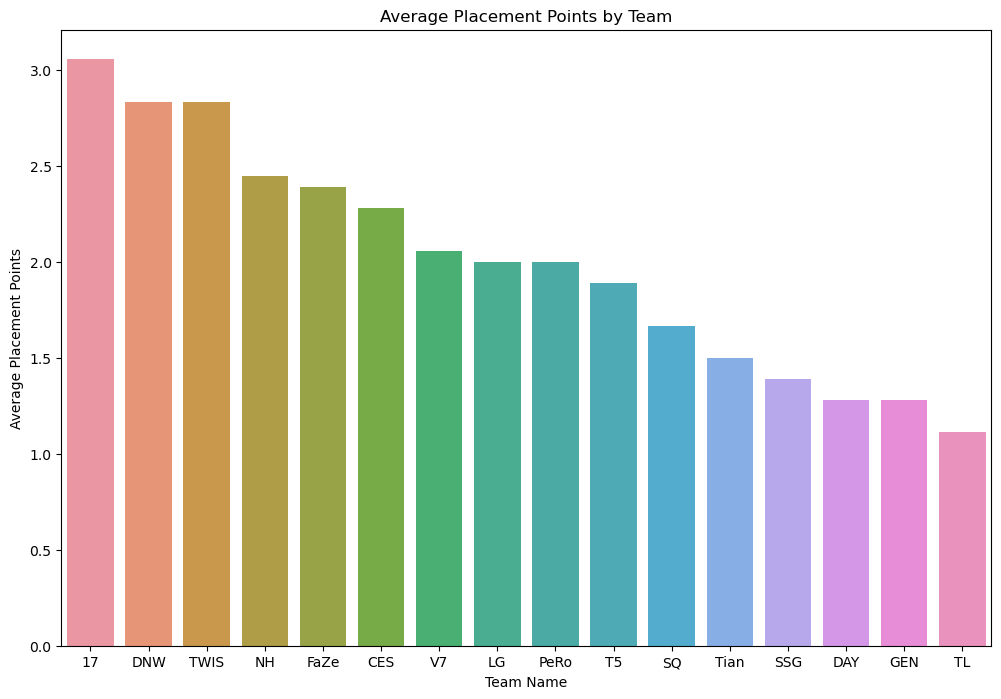

In [164]:
 # rank 형태의 winPlace -> 각 등수 승점으로 변환
def calculate_points(place):
    if place == 1:
        return 10
    elif place == 2:
        return 6
    elif place == 3:
        return 5
    elif place == 4:
        return 4
    elif place == 5:
        return 3
    elif place == 6:
        return 2
    elif place in [7, 8]:
        return 1
    else:
        return 0

df_p['place_points'] = df_p['winPlace'].apply(calculate_points)
# df_p['place_points']

# 팀별 평균 승점 계산
team_avg_points = df_p.groupby('team_name')['place_points'].mean().reset_index()
team_avg_points = team_avg_points.sort_values(by='place_points', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='team_name', y='place_points', data=team_avg_points)
plt.title('Average Placement Points by Team')
plt.xlabel('Team Name')
plt.ylabel('Average Placement Points')
plt.show()

DBNOs             -0.353791
assists           -0.313804
boosts            -0.471327
damageDealt       -0.511517
headshotKills     -0.187179
heals             -0.288303
killPlace          0.655043
killStreaks       -0.307151
kills             -0.385583
longestKill       -0.297567
revives           -0.234354
rideDistance       0.037088
roadKills         -0.031663
swimDistance      -0.004761
teamKills         -0.026161
timeSurvived      -0.731026
vehicleDestroys   -0.163939
walkDistance      -0.505091
weaponsAcquired   -0.118824
winPlace           1.000000
place_points      -0.848455
dtype: float64


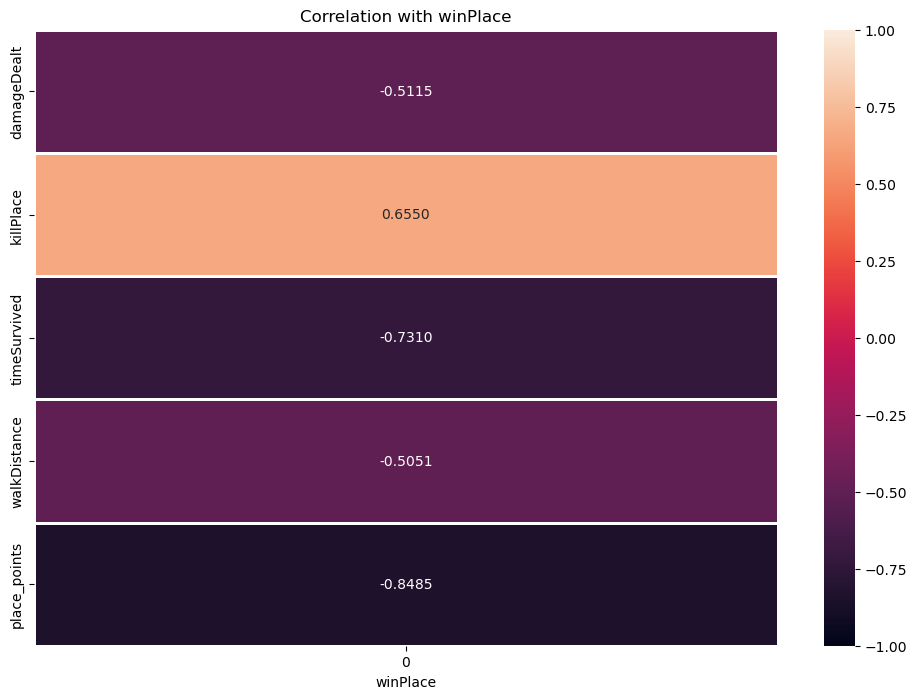

In [165]:
# PLACEMENT 과 상관관계가 있는 피처 추출

correlation_matrix = df_p.corrwith(df_p.winPlace, numeric_only=True)
print(correlation_matrix)

# 0.5 이상인 상관 관계에 대한 mask 생성
mask = (np.abs(correlation_matrix) >= 0.5) & (correlation_matrix != 1)


plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(correlation_matrix[mask]), annot=True,fmt='.4f', linewidths=2, vmin=-1, vmax=1)
plt.title('Correlation with winPlace')
plt.xlabel('winPlace')
plt.show()

In [166]:

features = ['walkDistance', 'timeSurvived', 'killPlace', 'damageDealt']

team_pivot = pd.pivot_table(data=df_p, index=['team_name'], values=features, aggfunc='mean').sort_values(by='damageDealt', ascending=False)
team_pivot


,damageDealt,killPlace,timeSurvived,walkDistance
team_name,,,,
DNW,285.914052,27.583333,1394.541667,1456.325344
TWIS,243.097178,29.986111,1362.375000,1284.680308
CES,240.556303,30.986111,1313.944444,1471.418439
FaZe,210.429910,30.888889,1205.083333,1184.700705
PeRo,207.871021,33.833333,1178.027778,1109.692602
LG,207.066743,34.333333,1247.402778,1037.285907
T5,203.046201,38.805556,1260.319444,1063.065418
Tian,199.398794,29.916667,1226.416667,1003.694852
V7,197.078157,37.263889,1117.458333,1065.732370


In [167]:
# 'team_name'을 기준으로 df_p와 team_pivot을 합침
merged_df = pd.merge(df_p[['team_name','place_points']], team_pivot, left_on='team_name', right_index=True)
merged_df = merged_df.pivot_table(values=merged_df.columns, index='team_name', aggfunc=np.mean)
merged_df

,damageDealt,killPlace,place_points,timeSurvived,walkDistance
team_name,,,,,
17,196.300448,29.736111,3.055556,1396.930556,1080.965781
CES,240.556303,30.986111,2.277778,1313.944444,1471.418439
DAY,178.137909,32.750000,1.277778,1310.138889,1127.112239
DNW,285.914052,27.583333,2.833333,1394.541667,1456.325344
FaZe,210.429910,30.888889,2.388889,1205.083333,1184.700705
GEN,150.283876,37.569444,1.277778,1221.875000,1005.664573
LG,207.066743,34.333333,2.000000,1247.402778,1037.285907
NH,185.114511,32.444444,2.444444,1332.069444,1305.368913
PeRo,207.871021,33.833333,2.000000,1178.027778,1109.692602


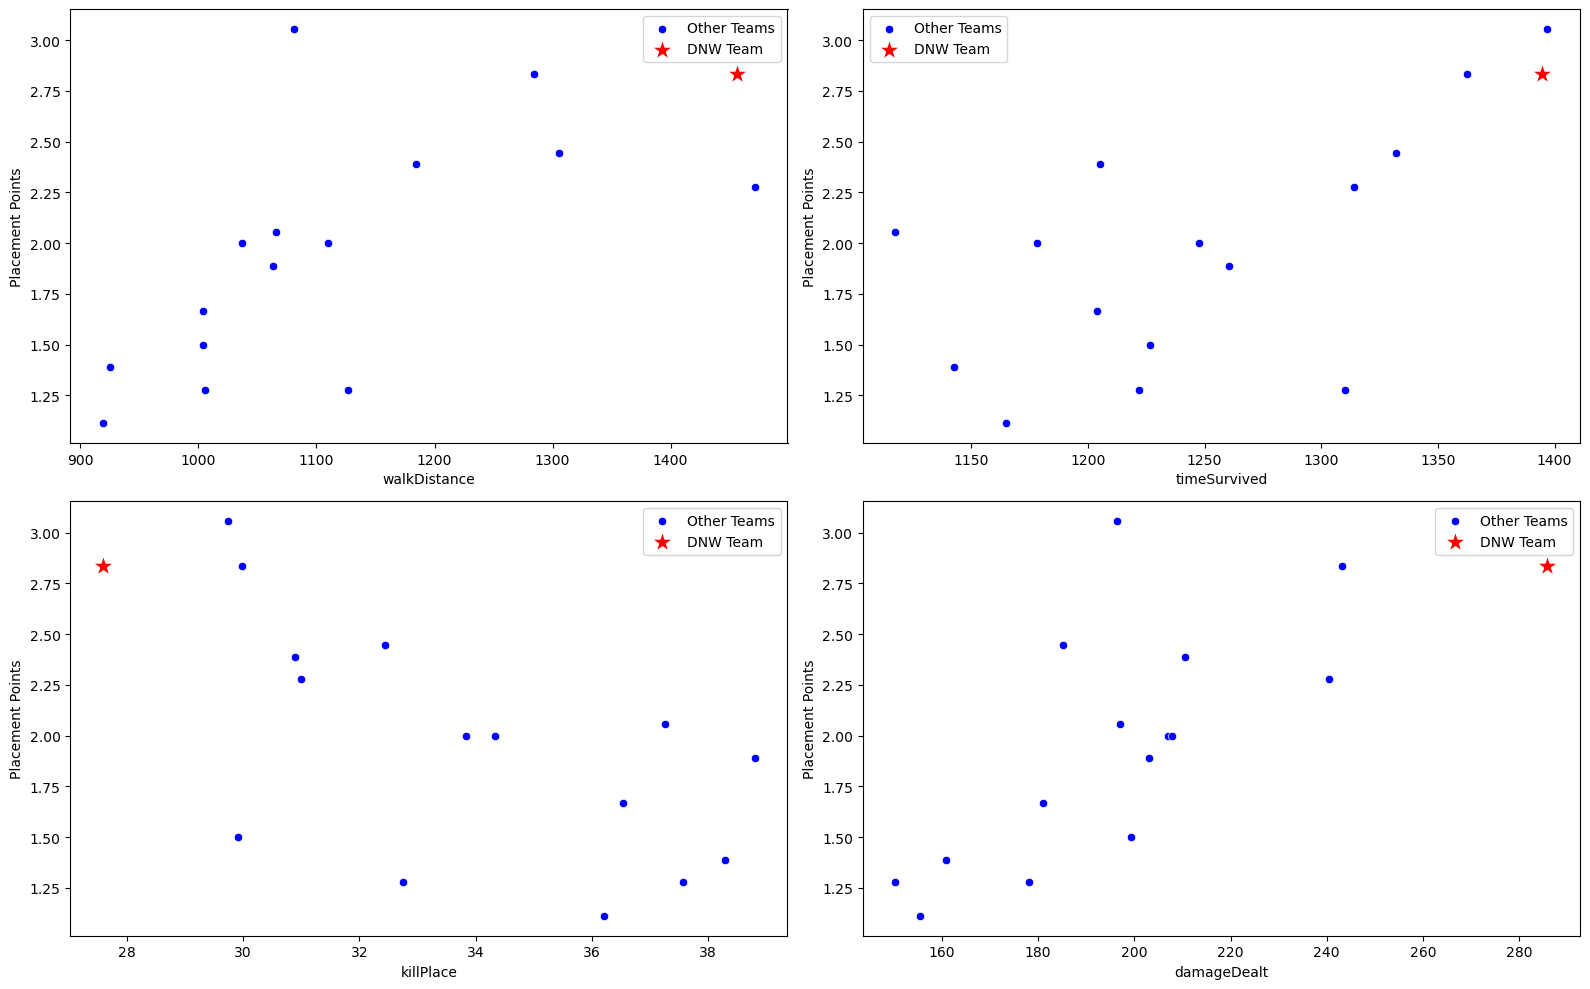

In [168]:
plt.figure(figsize=(16, 10))
for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.scatterplot(data=merged_df, x=feature, y='place_points', color='blue', label='Other Teams')
    sns.scatterplot(data=merged_df[merged_df.index == 'DNW'], x=feature, y='place_points', color='red', marker='*', s=300, label='DNW Team')
    plt.xlabel(f'{feature}')
    plt.ylabel('Placement Points')
    plt.legend()

plt.tight_layout()
plt.show()

##### Insight ----------------

- walkDistance : DNW 팀은 다른 팀보다 경기에서 이동한 거리를 의미하는 피처인 walkDistance가 긴편. 
> 경기에서 이동한 거리가 길다는 것은 경기 내에서 많은 활동을 했다는 것을 의미

- timeSurvived : DNW 팀은 생존시간을 의미하는 피처인 timeSurvived가 두번째로 김. 
> DNW 팀이 후반에도 안정적으로 순위를 유지하며 오랜기간 살아남았음을 의미.

- killPlace : DNW 팀은 killPlace가 가장 낮음(= 킬 수의 랭킹이 가장 높음). 
> 이는 DNW 팀이 교전에서 뛰어난 실력을 보였음을 의미

- damageDealt : DNW 팀은 damageDealt가 가장 높음. 
> 이는 DNW 팀이 교전에서 적에게 최다 피해를 입혔음을 의미.

### 2-2. KILLS
- included.attributes.stats.killS: 총 살상 횟수(매치기준)
- kill points : 1 kill 당 1점 추가점수 

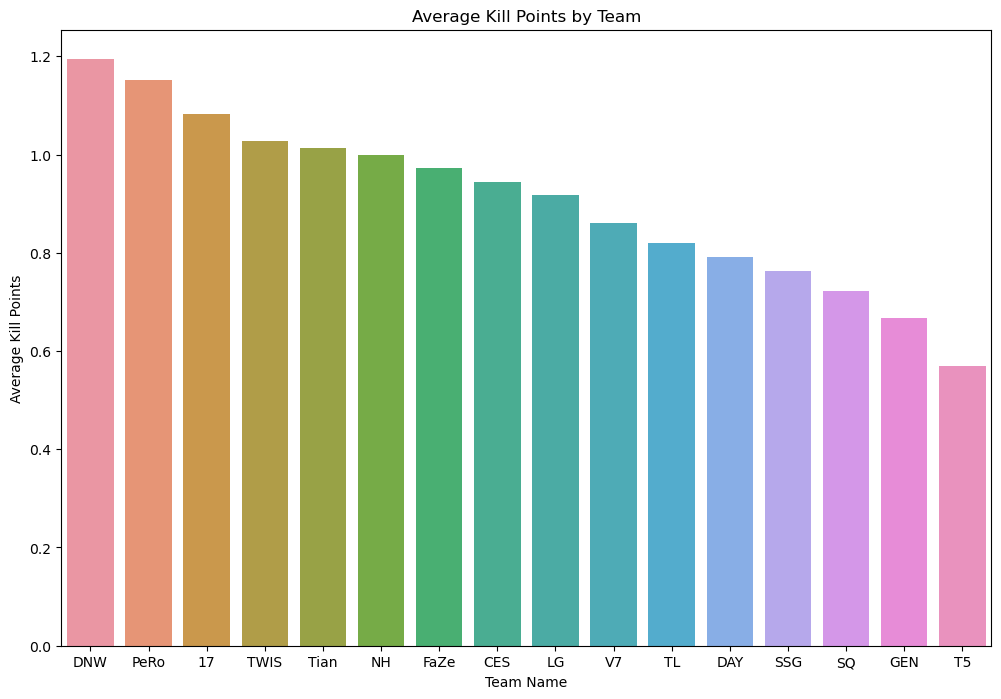

In [169]:
# kill points
# 1 kill 당 1점 추가점수 

# 팀별 평균 킬 계산
team_avg_points = df_p.groupby('team_name')['kills'].mean().reset_index()
team_avg_points = team_avg_points.sort_values(by='kills', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='team_name', y='kills', data=team_avg_points)
plt.title('Average Kill Points by Team')
plt.xlabel('Team Name')
plt.ylabel('Average Kill Points')
plt.show()

DBNOs              0.742438
assists            0.293041
boosts             0.390328
damageDealt        0.691875
headshotKills      0.572373
heals              0.299134
killPlace         -0.842320
killStreaks        0.841226
kills              1.000000
longestKill        0.604086
revives            0.236776
rideDistance      -0.041316
roadKills          0.020289
swimDistance      -0.003242
teamKills         -0.004323
timeSurvived       0.472977
vehicleDestroys    0.230438
walkDistance       0.412576
weaponsAcquired    0.127648
winPlace          -0.385583
place_points       0.406627
dtype: float64


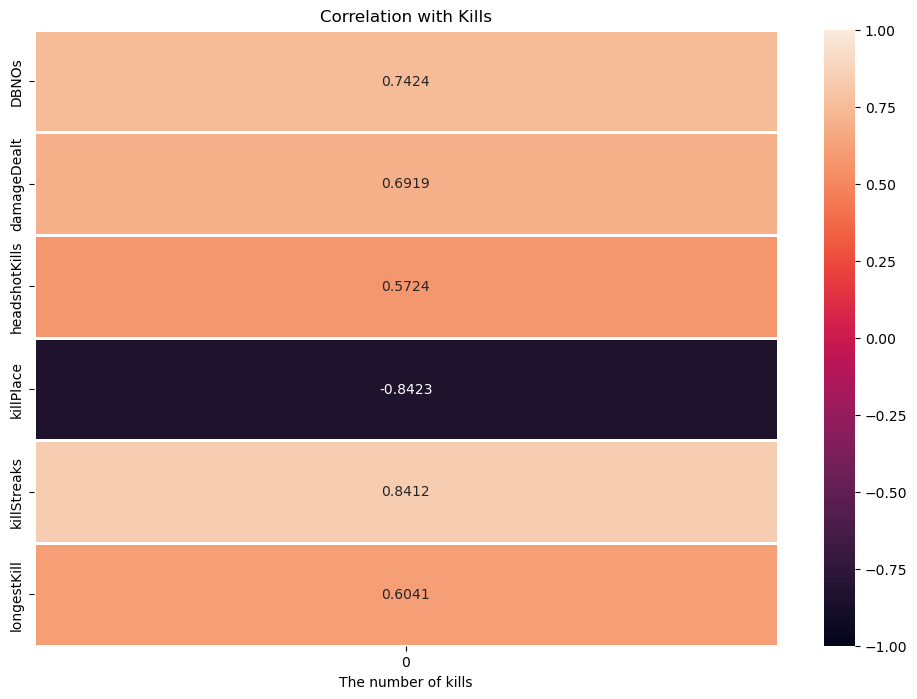

In [170]:
# KILLS 과 상관관계가 있는 피처 추출

correlation_matrix = df_p.corrwith(df_p.kills, numeric_only=True)
print(correlation_matrix)

# 0.5 이상인 상관 관계에 대한 mask 생성
mask = (np.abs(correlation_matrix) >= 0.5) & (correlation_matrix != 1)


plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(correlation_matrix[mask]), annot=True,fmt='.4f', linewidths=2, vmin=-1, vmax=1)
plt.title('Correlation with Kills')
plt.xlabel('The number of kills')
plt.show()

In [171]:
features = ['DBNOs', 'damageDealt', 'killPlace', 'headshotKills', 'killStreaks', 'longestKill']

team_pivot = pd.pivot_table(data=df_p, index=['team_name'], values=features, aggfunc='mean').sort_values(by='damageDealt', ascending=False)
team_pivot

,DBNOs,damageDealt,headshotKills,killPlace,killStreaks,longestKill
team_name,,,,,,
DNW,1.333333,285.914052,0.277778,27.583333,0.750000,70.096650
TWIS,1.097222,243.097178,0.222222,29.986111,0.583333,67.879151
CES,1.180556,240.556303,0.291667,30.986111,0.625000,84.179349
FaZe,1.138889,210.429910,0.305556,30.888889,0.625000,72.599777
PeRo,1.097222,207.871021,0.222222,33.833333,0.680556,44.771891
LG,0.930556,207.066743,0.180556,34.333333,0.527778,47.332071
T5,0.722222,203.046201,0.125000,38.805556,0.361111,31.133501
Tian,0.930556,199.398794,0.194444,29.916667,0.694444,62.744296
V7,0.958333,197.078157,0.236111,37.263889,0.597222,54.133651


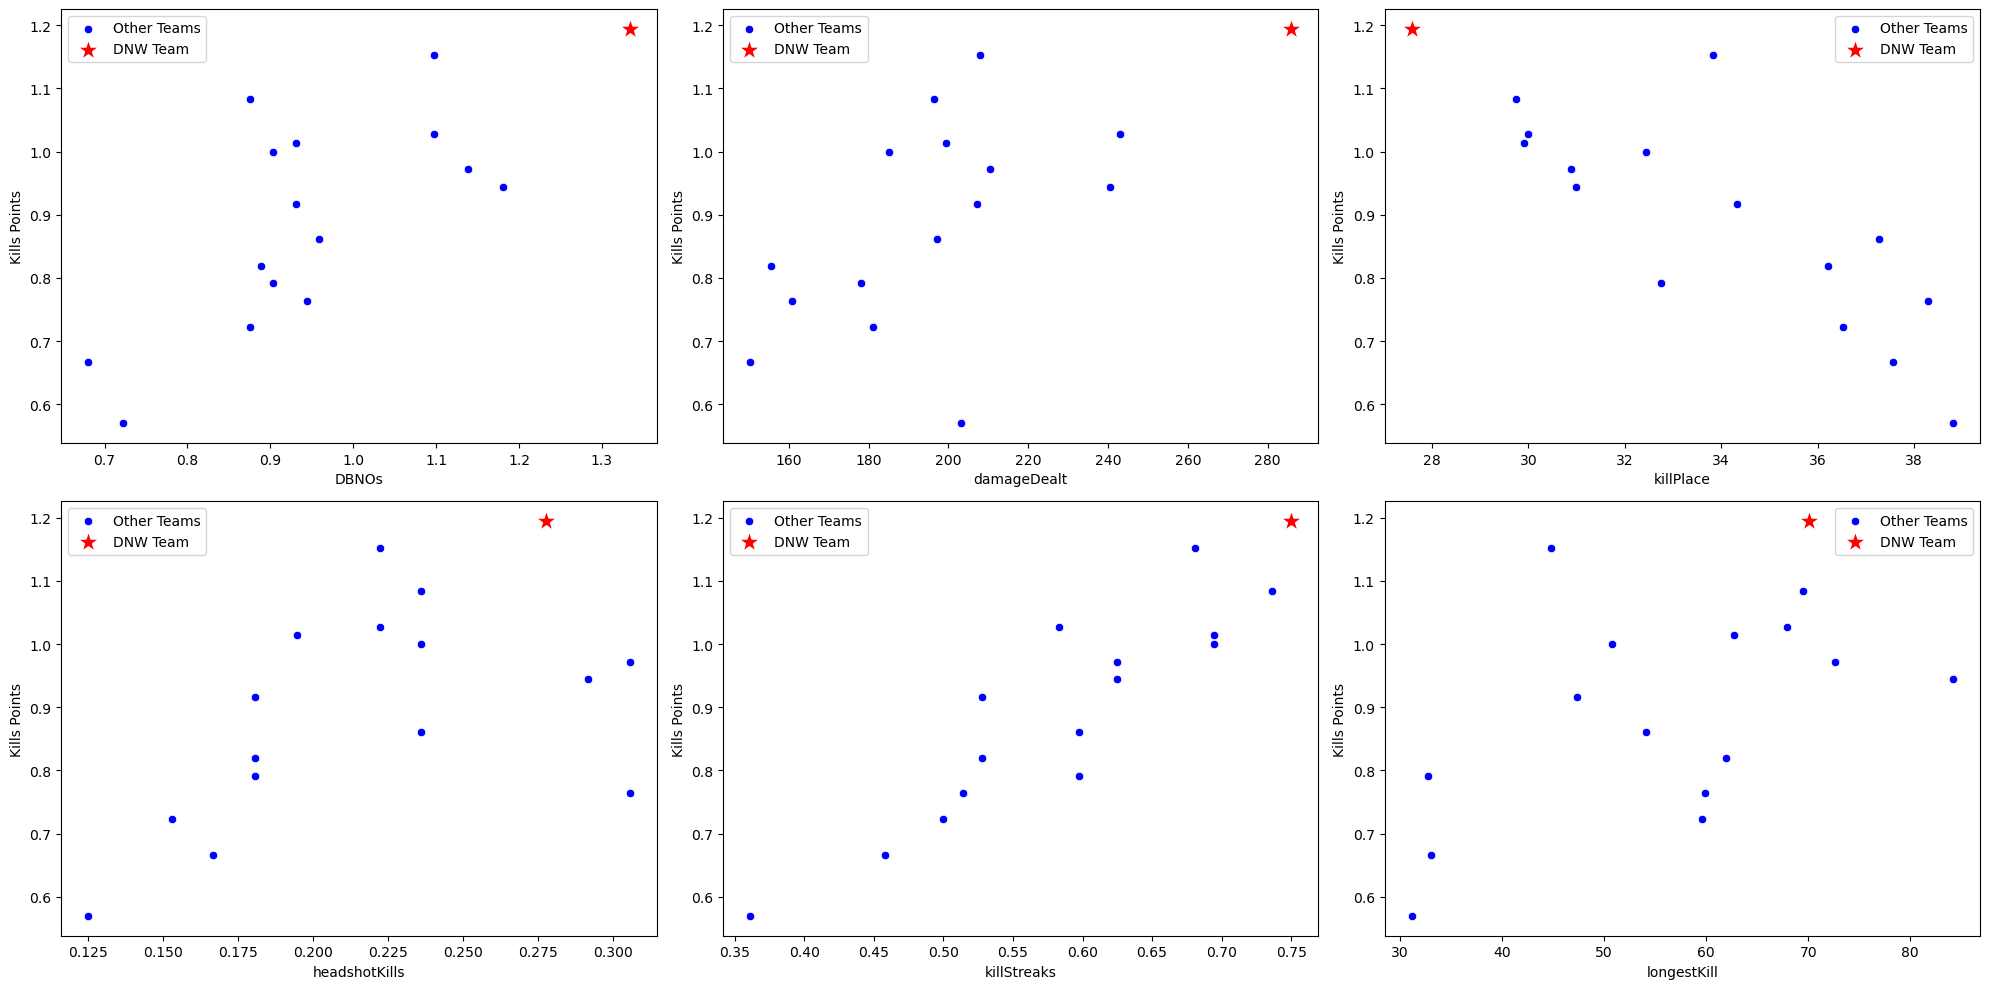

In [172]:
merged_df = pd.merge(df_p[['team_name','kills']], team_pivot, left_on='team_name', right_index=True)
merged_df = merged_df.pivot_table(values=merged_df.columns, index='team_name', aggfunc=np.mean)
merged_df

plt.figure(figsize=(20, 10))
for feature in features:
    plt.subplot(2, 3, features.index(feature) + 1)
    sns.scatterplot(data=merged_df, x=feature, y='kills', color='blue', label='Other Teams')
    sns.scatterplot(data=merged_df[merged_df.index == 'DNW'], x=feature, y='kills', color='red', marker='*', s=300, label='DNW Team')
    plt.xlabel(f'{feature}')
    plt.ylabel('Kills Points')
    plt.legend()

plt.tight_layout()
plt.show()

##### 2-2-1. DBNOs, kills 관계성

- dbno = Number of players knocked(0-)
- kill = Number of enemy players killed(0-129)


- DBNOs(Down But Not Out)
    - 플레이어가 기절 상태가 되었지만 아직 완전히 격퇴되지 않았을 때의 상태
    - 이 상태에서 팀원의 도움을 받아 부활할 수 있음(살아있는 팀원이 기절상태에 있는 팀원에게 붙어서 F 키를 누르면 8초 후 살아남)
    - DBNOs는 적의 공격을 피하고, 팀원과 협력하여 생존하는 능력을 반영하는 지표로 볼 수 있음

3) dbnos & kills 상관관계
    - `가설: dbnos가 높은 플레이어는 kills 도 높은 경향이 있을 것`
        - dbno가 높을수록, 선수는 적을 knock시킬 수 있는 기회가 많아짐. -> kill할 수 있는 기회가 많아짐.
        - dbno가 높을수록, 그 과정에서 적의 위치나 공격 방식을 파악할 수 있는 기회가 많아짐.
        - dbno가 높을수록, 선수는 kill을 위한 전략을 세우고 실행할 수 있는 여유가 많아짐.

In [173]:
# correlation coefficient 
from scipy import stats

corrrelation = np.corrcoef(merged_df.DBNOs, merged_df.kills)[0][1]
print("corr:", corrrelation) # > 0.5
# print(kills_dbnos_per_team.DBNOs.corr(kills_dbnos_per_team.kills))

p_value = stats.pearsonr(merged_df.DBNOs, merged_df.kills)[1]
print("p-value:", p_value) # < 0.05

corr: 0.7526435477564523
p-value: 0.0007668578406003458


##### Insight ------------

- dbnos & kills 상관관계

- `가설: dbnos가 높은 플레이어는 kills 도 높은 경향이 있을 것`
    - dbno가 높을수록, 선수는 적을 knock시킬 수 있는 기회가 많아짐.
    - dbno가 높을수록, 선수는 적을 knock시킨 후, kill할 수 있는 기회가 많아짐.
    - dbno가 높을수록, 선수는 kill을 위한 전략을 세우고 실행할 수 있는 여유가 많아짐.

- `결과: dbnos 와 kills 은 유의마한 상관관계가 있으며 통계적으로도 유의미하다는 것을 확인`
    - 인과관계에 대해서는 위와 같이 유추할 수 있음.

##### 2-2-2. killStreaks 와 Kills 의 관계

- 가장 높은 상관계수 보여줌 => 0.841226

- `가설1: kill -> killStreaks` 
    - kill을 많이 하기 때문에, killStreaks도 많아진다는 가설
    - kill을 많이 할수록 적을 죽일 기회가 많아지고, 따라서 연속으로 적을 죽일 가능성도 높아진다는 것을 근거로 할 수 있음

- `가설 2: killStreaks -> kill` 
    - killStreaks를 많이 하기 때문에 kill도 많아진다는 가설
    - killStreaks를 많이 하면 게임에서 유리한 위치에 서게 되고, 따라서 적을 죽일 기회가 많아진다는 것을 근거로 할 수 있음
        - 무기와 장비 우위: killStreaks가 높은 팀은 적을 죽일 때마다 무기와 장비 획득 가능. 무기와 장비 우위는 적을 더 쉽게 죽일 수 있는 기반을 제공.
        - 맵 장악 우위: killStreaks가 높은 팀은 적의 진영을 더 쉽게 침투, 적의 주요 목표물을 더 쉽게 공격 가능.
        - 정신적 우위: killStreaks가 높은 팀은 자신감과 승리 의욕이 높아짐. 이러한 정신적 우위는 적을 더 쉽게 죽일 수 있는 동기 제공.

- `가설 3: killStreaks <-> kill 상호작용`

In [174]:
# correlation coefficient 

corrrelation = np.corrcoef(merged_df.killStreaks, merged_df.kills)[0][1]
print("corr:", corrrelation) # > 0.5

p_value = stats.pearsonr(merged_df.killStreaks, merged_df.kills)[1]
print("p-value:", p_value) # < 0.05

corr: 0.9157055411964822
p-value: 6.473945061667584e-07


### 2-3. Total Points
- Placement Points + Kills

C:\Users\yoohy\AppData\Local\Temp\ipykernel_69268\3066187420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p["total_points"] = df_p.place_points +  df_p.kills


DBNOs                0.553708
assists              0.386679
boosts               0.480304
damageDealt          0.659698
headshotKills        0.384648
heals                0.306574
killPlace           -0.739233
killStreaks          0.530266
kills                0.676012
longestKill          0.420106
revives              0.250742
rideDistance        -0.057903
roadKills            0.018954
swimDistance        -0.005548
teamKills           -0.001505
timeSurvived         0.685651
vehicleDestroys      0.199928
walkDistance         0.512749
weaponsAcquired      0.123429
winPlace            -0.818546
place_points         0.948104
kills_and_assists    0.688488
total_points         1.000000
dtype: float64


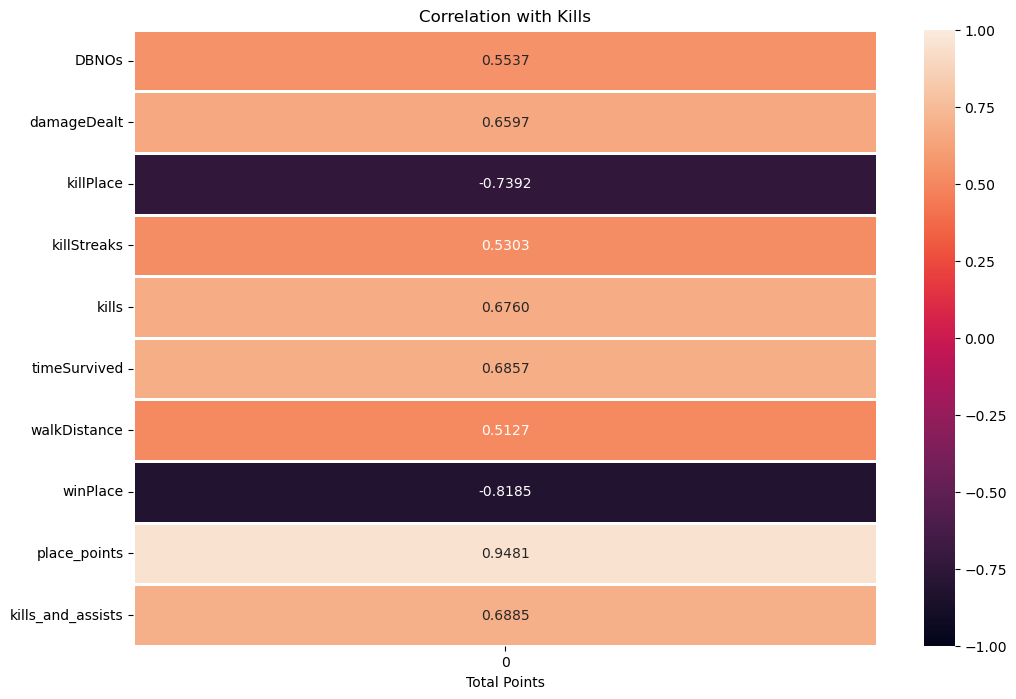

In [118]:
# Total Points 와 상관관계가 있는 피처 추출

df_p["total_points"] = df_p.place_points +  df_p.kills 
correlation_matrix = df_p.corrwith(df_p.total_points, numeric_only=True)
print(correlation_matrix)

# 0.5 이상인 상관 관계에 대한 mask 생성
mask = (np.abs(correlation_matrix) >= 0.5) & (correlation_matrix != 1)


plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(correlation_matrix[mask]), annot=True,fmt='.4f', linewidths=2, vmin=-1, vmax=1)
plt.title('Correlation with Kills')
plt.xlabel('Total Points')
plt.show()

##### Insights --------------
- total points 와 유의미한 상관관계가 있는 피처들은 total points의 요소인 placement points와 kills 의 유의미한 상관관계를 가진 피처에 벗어나지 않음

##### 2-3-1. 매치별 TOTAL Points 추세

In [140]:
TotalPoints_df = pd.read_csv("PGC_eSports_Tournament_Results.csv", encoding="utf-8")
TotalPoints_df = TotalPoints_df.drop(columns=['Total Points', 'Total Kills'])
TotalPoints_df

,Team,Match 1 K,Match 1 PL,Match 1 PO,Match 2 K,Match 2 PL,Match 2 PO,Match 3 K,Match 3 PL,Match 3 PO,...,Match 15 PO,Match 16 K,Match 16 PL,Match 16 PO,Match 17 K,Match 17 PL,Match 17 PO,Match 18 K,Match 18 PL,Match 18 PO
0,Danawa e-sports,3,8,4,6,6,8,5,2,11,...,5,10,1,20,1,11,1,2,10,2
1,17Gaming,5,5,8,0,14,0,4,11,4,...,11,1,10,1,11,1,21,6,14,6
2,Twisted Minds,2,6,4,8,11,8,5,5,8,...,0,1,15,1,4,4,8,0,12,0
3,Petrichor Road,5,15,5,1,10,1,4,13,4,...,8,7,2,13,15,2,21,5,4,9
4,Newhappy,3,10,3,10,1,20,1,9,1,...,17,4,7,5,1,16,1,4,7,5
5,FaZe Clan,3,2,9,5,5,8,2,15,2,...,1,7,3,12,8,6,10,1,15,1
6,CERBERUS Esports,2,4,6,4,2,10,1,4,5,...,7,6,8,7,1,8,2,2,9,2
7,Luminosity Gaming,3,16,3,3,9,3,14,3,19,...,0,11,4,15,0,13,0,1,11,1
8,Tianba,7,9,7,2,15,2,5,7,6,...,2,3,6,5,4,7,5,5,3,10
9,V7 FUNPIN,4,3,9,1,16,1,7,1,17,...,2,2,12,2,0,15,0,12,1,22


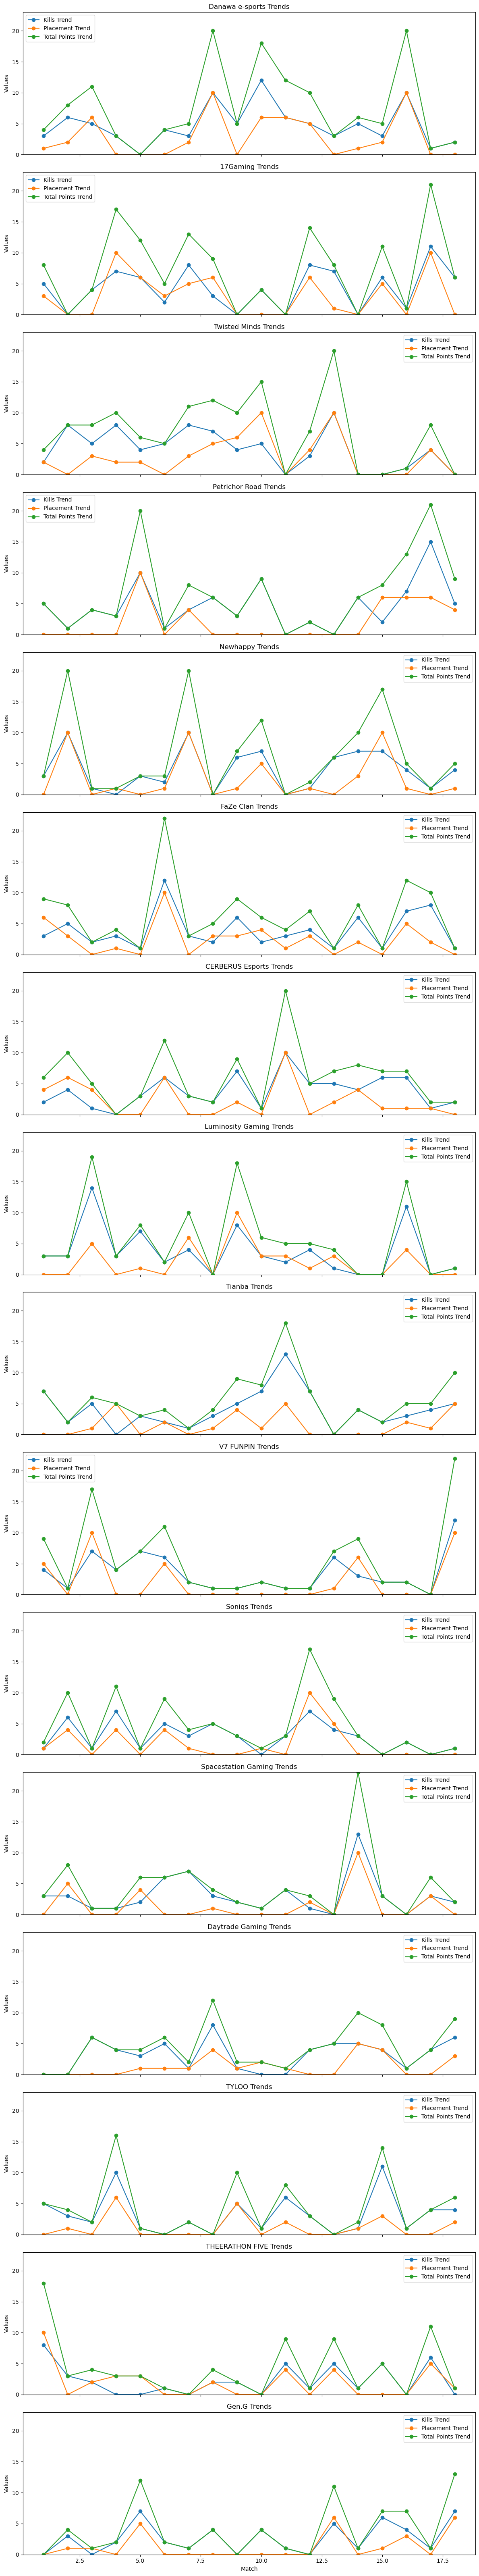

In [143]:
teams = TotalPoints_df["Team"].unique()


fig, axs = plt.subplots(len(teams), 1, figsize=(12, 4 * len(teams)), sharex=True)

for i, team in enumerate(teams):
    team_data = TotalPoints_df[TotalPoints_df["Team"] == team] 

    # Kills 추세
    axs[i].plot(range(1, 19), team_data.filter(like='K').values.flatten(), marker='o', label='Kills Trend')

    # Placement 추세
    # Placement Point 로 변경
    axs[i].plot(range(1, 19), team_data.filter(like='PO').values.flatten() - team_data.filter(like='K').values.flatten(), marker='o', label='Placement Trend')
    
    # axs[i].plot(range(1, 19), team_data.filter(like='PL').values.flatten(), marker='o', label='Placement Trend')

    # Total Points 추세
    axs[i].plot(range(1, 19), team_data.filter(like='PO').values.flatten(), marker='o', label='Total Points Trend')

    axs[i].set_title(f'{team} Trends')
    axs[i].set_ylabel('Values')
    axs[i].legend()

    # y축 범위 설정
    axs[i].set_ylim(0, 23)

# x축 설정
plt.xlabel('Match')

plt.tight_layout()
plt.show()


##### DNW 팀의 경기 전반적인 성과 분석

- 킬 수(Kills): 킬 수는 경기 초반에는 낮게 유지되다가, 중반 이후에 급격히 증가. 경기 후반에는 다시 감소하는 추세. 하지만 다른 팀에 비해 DNW 의 경우, 비교적 높게 유지되는 것을 확인할 수 있음

- 매치 등수(Placement): 계속해서 등수가 올라갔다 내려갔다를 반복.

- 최종 점수(Total Points): 최종 점수는  중반 이후에 급격한 변화가 발생. 경기 후반에는 다시 안정화되는 추세이지만 마지막에는 떨어짐.

[경기 전략 분석]
> PGC 23 그랜드 파이널은 경기 초반에는 조심스럽게 경기를 진행하다가, 중반 이후에는 적극적으로 경기를 펼치는 전략을 사용했음을 유추.

> 또한, 경기 초반, 중반, 후반에도 계속해서 순위가 급격하게 변화하는 경우가 있었고, 2-3위와의 경쟁도 치열했기 때문에, 경기 후반까지 긴장을 놓치지 않는 것이 중요했음 보여줌


##### DNW 팀의 PGC23 Grand Final 경기에서의 우승 요인 분석

1) 뛰어난 활동성 및 이동 거리
: DNW 팀은 경기에서 이동한 거리가 길고, 생존시간도 상위에 위치. 
> 이는 DNW 팀이 경기 전반과 후반에 걸쳐 활발한 활동을 펼치며 많은 지역을 이동했음을 시사. 

> 많은 이동 거리는 다양한 전략적인 위치 선점이나 적과의 교전에서의 우위를 가져다 줄 수 있음.

2) 뛰어난 교전 실력
: DNW 팀은 killPlace에서 가장 낮은 순위를 기록. 즉, 킬 수의 랭킹이 높은데, 이는 DNW 팀이 경기 중 교전에서 뛰어난 실력을 보여줬음을 나타냄. 
> 좋은 교전 실력은 경기에서 다수의 적을 격파하고 상위 랭킹에 도달하는 데 기여할 수 있음을 시사.

3) 적에게 가한 피해량: DNW 팀은 damageDealt에서 가장 높은 값을 기록. 높은 피해량은 DNW 팀이 교전에서 적에게 상당한 피해를 입혔다는 것을 의미. 
> 효과적인 공격은 경기에서 상위 랭킹을 유지하는 데 큰 역할을 할 수 있음을 시사.

------------

```종합하면, DNW 팀은 뛰어난 활동성, 교전 실력, 피해량과 같이 높은 순위를 유지할 수 있는 핵심 요인들이 결합되어 PGC23 Grand Final에서 우승을 차지한 것으로 보임. 이러한 특징들은 DNW 팀이 다양한 상황에 대처하고 경기 전반에 걸쳐 일관된 성과를 보여준 결과로 해석될 수도 있음.```